## 12.4 Homework

- 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

- 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

#### Procedure

In order to calculate it, we need to get the `tranformation` from uniform $x$ to weighted $x_i$.

- Search for the weight founction $w(x)$
- find the probability function $p(x)$ and then the cumulative distribution function $F(x)$
- Inverse transform sampling to $F^{-1}(x)$
- averge $f(x)/w(x)$ in the points generated from $F^{-1}(x)$

<ipython-input-1-91a9154d693d>:26: RuntimeWarning: divide by zero encountered in power
  f = lambda x: x**(-1/2)/(exp(x)+1)


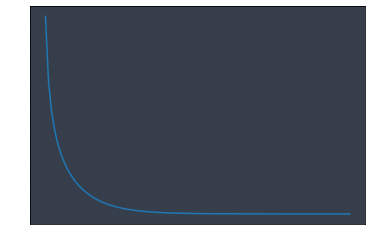

In [1]:
%matplotlib inline
#matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy import exp, log, sqrt
from random import random
from scipy import integrate

# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
#COLOR = 'black'

plt.rcParams['axes.facecolor']= '#373e4b'
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


p = lambda x: x**2
f = lambda x: x**(-1/2)/(exp(x)+1)

_x = np.linspace(0,10,100)
_y=f(_x)
#print(_y)
plt.plot(_x,_y)
plt.show()

#### Procedure

$$ w(x) = x^{-1/2} $$
$$\downarrow$$
$$ p(x) = \frac{w(x)}{\int_a^b w(x)dx} $$
$$\downarrow$$
$$ p(x) = \frac{x^{-1/2}}{\int_0^1 x^{-1/2}dx} = \frac{x^{-1/2}}{2((1)^{1/2}-(0)^{1/2})} = \frac{1}{2}x^{-1/2} $$
$$\downarrow$$
$$ p(x) = \frac{1}{2}x^{-1/2} $$
$$$$ $$$$
$$ z = \int_0^{F^{-1}(z)} p(x')dx' $$
$$\downarrow$$
$$ z = \int_0^{F^{-1}(z)} \frac{1}{2}(x')^{-1/2}dx' $$
$$\downarrow$$
$$ z = \frac{1}{2}(2*F^{-1}(z)^{1/2}-2*(0)^{1/2}) $$
$$\downarrow$$
$$ z = F^{-1}(z)^{1/2} $$
$$\downarrow$$
$$ F^{-1} = z^{2} $$


In [2]:
f = lambda x: x**(-1/2)/(exp(x)+1)
w = lambda x: x**(-1/2)
F_inv = lambda x: x*x


def MC_I(func, weight, func_inv, lower_lim=0, upper_lim=1, N=100):
    sums = 0
    weight_solution = integrate.quad(weight, lower_lim, upper_lim)
    for i in range(N):
        x = random()
        y = F_inv(x)
        sums += func(y)/weight(y)
    
    integral_sol = (sums/N)*weight_solution[0]
    return integral_sol

In [3]:
sp_quad_sol = integrate.quad(f,0,1)
print("Monte Carlo Importance Sampling Solution:", MC_I(f,w, F_inv, N=1000000))
print("Scipy Quad Integration Solution:",sp_quad_sol[0])

Monte Carlo Importance Sampling Solution: 0.8388363856208704
Scipy Quad Integration Solution: 0.8389329600133792


In [4]:
lower = 10**(-100)
upper = 1
f_2 = lambda x: (x**-1)/(exp(x)+1)
w_2 = lambda x: 1/x
F_inv_2 = lambda x: (10**-100)*exp(100*x*log(10))

 
f_2_sol = integrate.quad(f_2, lower, 1)

f_2_sol_2 = integrate.quad(f_2, 0.000000000000001, 1)

f_2_sol_3 = integrate.quad(f_2, 0.0000000000000001, 1)

print(f_2_sol)
print(f_2_sol_2)
print(f_2_sol_3)

(20.594976039904015, 4.675280186570254)
(17.025943899665346, 3.5117649618631506e-10)
(18.177236466242032, 0.005455939540208998)


<ipython-input-4-263f556be25b>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f_2_sol = integrate.quad(f_2, lower, 1)
<ipython-input-4-263f556be25b>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose in

In [5]:
f_2_MC_sol = MC_I(f_2, w_2, F_inv_2, lower_lim=lower, upper_lim=upper, N=1000000)

print("Monte Carlo Importance Sampling Solution:", f_2_MC_sol)

<ipython-input-2-b96e6b4af52c>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  weight_solution = integrate.quad(weight, lower_lim, upper_lim)


Monte Carlo Importance Sampling Solution: 17.481286504343657
